# Analysis of Netflix movies and TV Shows from 2000 to 2020

Import Python libraries

In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns



Import the dataset

In [596]:
df = pd.read_csv(r'Cleaned_Netflix_Titles_Data.csv')

## Data Cleaning

View the first 5 rows

In [471]:
#View top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


View the data column types

In [472]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Convert data types

In [473]:
df.convert_dtypes().dtypes

show_id         string[python]
type            string[python]
title           string[python]
director        string[python]
cast            string[python]
country         string[python]
date_added      string[python]
release_year             Int64
rating          string[python]
duration        string[python]
listed_in       string[python]
description     string[python]
dtype: object

Clean the listed_in column and extract the first type

In [597]:
#Cleaning - 'listed_in' column
a = []
for x in (np.arange(0,len(df),1)):
    a.append(df['listed_in'][x].split()[0])

Add a new column "Movie and TV Series Category" and use the cleaned data

In [598]:
df['categories'] = a

In [599]:
df['categories'] = df['categories'].str.lstrip().str.rstrip().replace(",", "", regex=True).replace("'","",regex=True)

Remove useless data columns

In [600]:
df = df[['show_id', 'type', 'title', 'director', 'cast', 'date_added','country','release_year', 'rating', 'duration', 'categories']]

Observe the first 5 rows of the new data set

In [478]:
df.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,categories
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020-08-14,2020,TV-MA,4 Seasons,International
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016-12-23,2016,TV-MA,93 min,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2018-12-20,2011,R,78 min,Horror
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2017-11-16,2009,PG-13,80 min,Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2020-01-01,2008,PG-13,123 min,Dramas


## Observe the data

**Observe the distribution of the number of movies and TV series**

In [480]:
# Ensure that the data is loaded successfully
print(df.head())  # Check the first 5 rows


  show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast  date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  2018-12-20   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  2017-11-16   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  2020-01-01   

   release_year rating   duration     categories  
0          2020  TV-MA  4 Seasons  International  
1          2016  TV-MA     93 min         Dramas  
2          2011      R     78 min         Horror  
3          2009  PG-13     80 min         Action  
4          2008  PG-13    123 min         Drama

In [481]:
print(df.columns)  # View all column names

Index(['show_id', 'type', 'title', 'director', 'cast', 'date_added',
       'release_year', 'rating', 'duration', 'categories'],
      dtype='object')


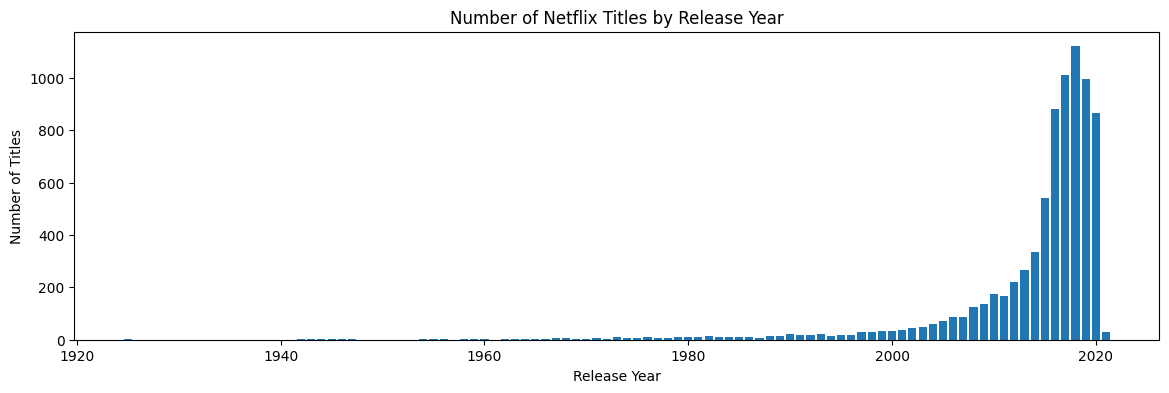

In [482]:
data = df['release_year'].value_counts().sort_index(ascending=False)
fig,ax=plt.subplots(figsize=(14,4))
ax.bar(data.index, data.values)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Number of Netflix Titles by Release Year")
plt.show()

**Since 2000, the data has shown significant changes, so the analysis focuses on the period from 2000 to 2020.**

Select the data from the release years of movies and TV series from 2000 to 2020 and generate a new data table

In [483]:
df = df.loc[(df['release_year'] <= 2020) & (df['release_year'] >= 2000)]

In [484]:
df.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,categories
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020-08-14,2020,TV-MA,4 Seasons,International
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016-12-23,2016,TV-MA,93 min,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2018-12-20,2011,R,78 min,Horror
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2017-11-16,2009,PG-13,80 min,Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2020-01-01,2008,PG-13,123 min,Dramas


## Analyze data

**The trend of the number of movies and TV series released**

Generate two tables for TV series and movie quantity respectively

In [485]:
df_tv = df.loc[df['type'] == 'TV Show']['release_year'].value_counts()
df_mv = df.loc[df['type'] == 'Movie']['release_year'].value_counts()
data = pd.concat([df_tv, df_mv], axis=1, keys=['tv', 'mv'])

The number of TV series and movies form a new table

In [487]:
# pd.concat([df_tv, df_mv], axis=1, keys=['tv', 'mv']).T
# Ensure 'release_year' is set as an index and sorted for both dataframes



# Transpose for better visualization

data.sort_values(by=['release_year'])
data.T


release_year,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2009,2008,2007,2006,2005,2003,2004,2002,2001,2000
tv,457,414,387,268,240,159,90,65,61,39,...,34,23,13,13,12,9,9,6,4,4
mv,411,582,734,744,642,382,244,202,158,127,...,103,102,72,72,61,40,50,39,32,30


Observe the trend of the number of movies and TV series released

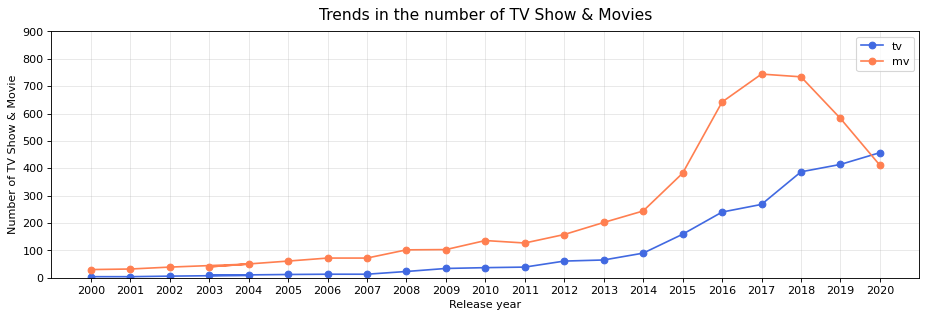

In [489]:

fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.plot(data.index, data['tv'], label='tv', marker='o', color='royalblue')
ax.plot(data.index, data['mv'], label='mv', marker='o', color='coral')
ax.legend()
ax.set_xticks(np.arange(2000, 2021,1))
ax.grid(alpha=0.3)
ax.set_ylim(0,900)
ax.set_title('Trends in the number of TV Show & Movies', y=1.02, fontsize=14)
ax.set_xlabel('Release year')
ax.set_ylabel('Number of TV Show & Movie')
plt.show()


**The production of TV dramas continues to increase.**

**The production of films began to decline in 2018.**

## Comparison of TV series and movie releases

Check the comparison of the number of movies and TV series

In [490]:
df['type'].value_counts()


type
Movie      4963
TV Show    2344
Name: count, dtype: int64

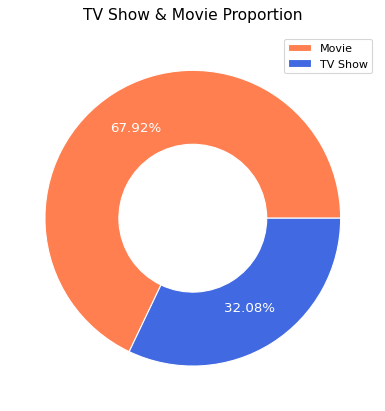

In [491]:
data = df['type'].value_counts()
fig,ax=plt.subplots(figsize=(6, 6), dpi=80)
ax.pie(data, labels=data.index, autopct='%1.2f%%', pctdistance=0.72, colors=['coral', 'royalblue'], 
       wedgeprops={'width':0.5, 'edgecolor':'white'}, textprops={'fontsize':12, 'color':'white'})
ax.legend(bbox_to_anchor=(1,0,0,1))

ax.set_title('TV Show & Movie Proportion', y=1.02, fontsize=14)
plt.show()

Over the past 20 years, movie production has been twice as high as television production.

## Comparison of the Number of Releases by movie and TV Ratings

Check the number of TV shows released for each rating

In [492]:
tv_rating = df.loc[df['type'] == 'TV Show']['rating'].value_counts()

Check the number of movies released for each rating

In [518]:
mv_rating = df.loc[df['type'] == 'Movie']['rating'].value_counts()

Generate a distribution table of the number of movies and TV series by rating

In [519]:
pd.concat([tv_rating, mv_rating], axis=1, keys=['tv', 'mv']).fillna(0).astype('int32')

,tv,mv
rating,,
TV-MA,1005,1787
TV-14,641,1156
TV-PG,292,463
TV-Y7,165,94
TV-Y,159,117
TV-G,72,107
NR,5,71
R,2,579
TV-Y7-FV,1,5


Observe the comparison of the number of movies and TV series by rating

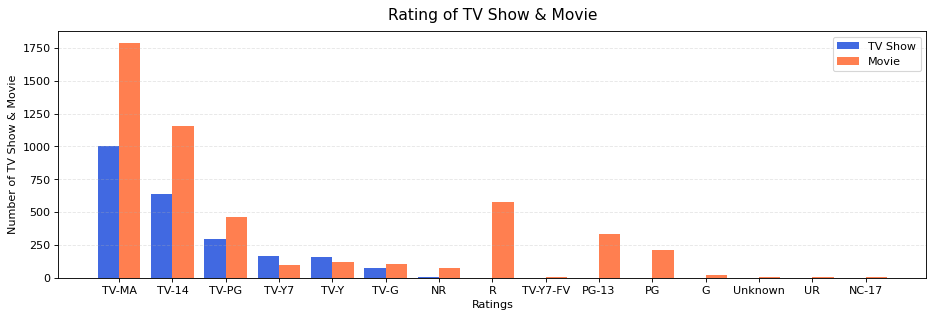

In [520]:
data = pd.concat([tv_rating, mv_rating], axis=1, keys=['tv', 'mv']).fillna(0).astype('int32')
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.bar(np.arange(0,len(data.index))-0.2, data['tv'], width=0.4, label='TV Show', color='royalblue')
ax.bar(np.arange(0,len(data.index))+0.2, data['mv'], width=0.4, label='Movie', color='coral')
ax.set_xticks(np.arange(0,len(data)))
ax.set_xticklabels(data.index)
ax.set_title('Rating of TV Show & Movie', y=1.02, fontsize=14)
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of TV Show & Movie')
ax.yaxis.grid(alpha=0.3, ls='--')
ax.legend()
plt.show()

TV series are generally not rated R

## Analyze TV series ratings

**Understand the movie and television rating rules**

**TV-MA**:  Television programs may contain content that is not suitable for viewers under 17 years old or intended for adults only.


**TV-Y**: Suitable for all children, including those aged 2 to 6.


**TV-Y7**: Television programs that may contain content not suitable for children under the age of 7.


**TV-Y7-FV**: An alternative version of TV-Y7. When a TV program contains more intense fictional violence than the TV-Y7 level, it will be rated TV-Y7-FV.


**TV-G**: General audience programs, suitable for all ages. While these programs are not specifically designed for children, most parents can allow their children to watch them without adult supervision.


**TV-PG**: Parental Guidance Suggested. Some content in this category may not be suitable for children and may include mild violence, sexual themes, or inappropriate behavior.


**TV-14**: This program may not be suitable for viewers under 14 years old.


**R**: Restricted – Recommended for viewers aged 17 and above.


**NC-17**: No one under 17 is allowed to watch, including those who are 17 years old.


**G**: General Audience – Suitable for everyone.


**PG**: Parental Guidance – Some content in films with this rating may not be suitable for children.


**PG-13**: Parents Strongly Cautioned – Recommended for children over 13 years old.



**Create two tables: TV dramas and movies.**

In [521]:
table_tv = df.loc[df['type'] == 'TV Show']
table_mv = df.loc[df['type'] == 'Movie']

Observe the number of movies in each rating category over the past 20 years.

In [522]:
pd.DataFrame(table_mv['rating'].value_counts()).T

rating,TV-MA,TV-14,R,TV-PG,PG-13,PG,TV-Y,TV-G,TV-Y7,NR,G,Unknown,TV-Y7-FV,UR,NC-17
count,1787,1156,579,463,335,213,117,107,94,71,24,5,5,4,3


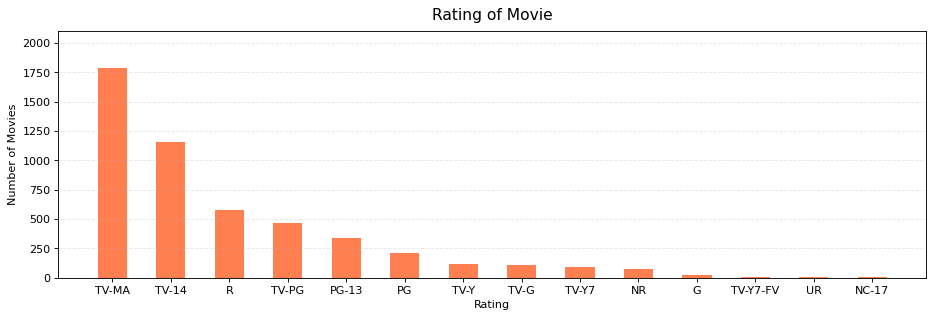

In [ ]:
data = pd.DataFrame(table_mv['rating'].value_counts())
data=data.drop(index=['Unknown'])# drop unknown data
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.bar(data.index, data['count'], color='coral', width=0.5)
ax.yaxis.grid(alpha=0.3, ls='--')
ax.set_ylim(0,2100)
ax.set_title('Rating of Movie', y=1.02, fontsize=14)
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
plt.show()





From the chart, it can be seen that the number of TV-MA, TV-14, and R-rated movies released is relatively high (over 500).

**Group by movie rating and release year to count the number of released works.**

In [541]:

pivot_mv = pd.DataFrame(table_mv.groupby(['rating', 'release_year']).size())

pivot_mv=pivot_mv.drop(index=['Unknown'])# drop unknown data
pivot_mv

0
rating   release_year   
G        2000          2
         2001          2
         2004          3
         2005          2
         2007          1
...                   ..
TV-Y7-FV 2016          2
         2018          1
UR       2007          2
         2008          1
         2016          1

[202 rows x 1 columns]

**Pivot the table above**

In [542]:
t_mv = pd.pivot_table(pivot_mv, index=['release_year'], columns=['rating']).fillna(0).astype('int32')[0]
t_mv

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
release_year,,,,,,,,,,,,,,
2000,2,0,0,4,8,7,5,0,1,3,0,0,0,0
2001,2,0,1,3,4,12,5,0,1,3,0,1,0,0
2002,0,0,0,4,13,10,6,0,5,1,0,0,0,0
2003,0,0,0,5,7,10,9,0,7,1,1,0,0,0
2004,3,0,1,8,6,5,10,0,9,8,0,0,0,0
2005,2,0,0,4,12,10,22,0,2,9,0,0,0,0
2006,0,0,1,8,12,8,20,0,12,10,0,1,0,0
2007,1,0,2,10,13,13,14,0,11,5,1,0,0,2
2008,0,0,0,8,21,16,26,1,19,7,1,2,0,1


**Observe the release trends of movies of each rating**

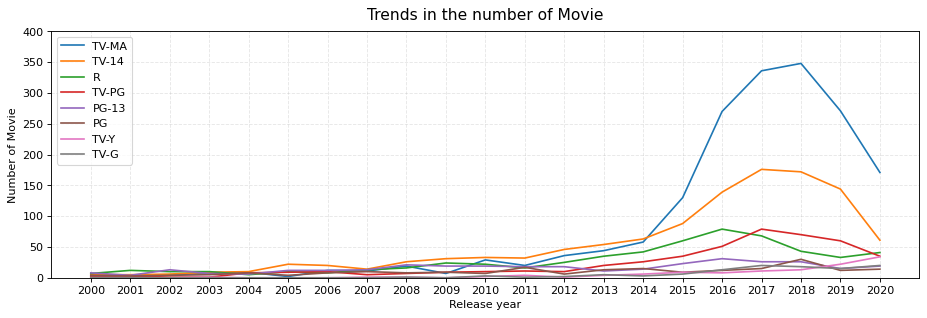

In [543]:
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.plot(t_mv.index, t_mv['TV-MA'].values, label='TV-MA')
ax.plot(t_mv.index, t_mv['TV-14'].values, label='TV-14')
ax.plot(t_mv.index, t_mv['R'].values, label='R')
ax.plot(t_mv.index, t_mv['TV-PG'].values, label='TV-PG')
ax.plot(t_mv.index, t_mv['PG-13'].values, label='PG-13')
ax.plot(t_mv.index, t_mv['PG'].values, label='PG')
ax.plot(t_mv.index, t_mv['TV-Y'].values, label='TV-Y')
ax.plot(t_mv.index, t_mv['TV-G'].values, label='TV-G')
ax.set_xticks(np.arange(2000,2021,1))
ax.legend(loc='upper left')
ax.set_ylim(0,400)
ax.grid(alpha=0.3, ls='--')
ax.set_title('Trends in the number of Movie', y=1.02, fontsize=14)
ax.set_xlabel('Release year')
ax.set_ylabel('Number of Movie')
plt.show()

Before 2014, the number of movies of each rating remained relatively stable. Starting from 2015, the production of TV-MA, TV-14, R, and TV-PG rated movies increased significantly. Production began to decline again in 2019.

**Observe the number of TV shows of each rating over the past 20 years.**

In [530]:
pd.DataFrame(table_tv['rating'].value_counts()).T

rating,TV-MA,TV-14,TV-PG,TV-Y7,TV-Y,TV-G,NR,Unknown,R,TV-Y7-FV
count,1005,641,292,165,159,72,5,2,2,1


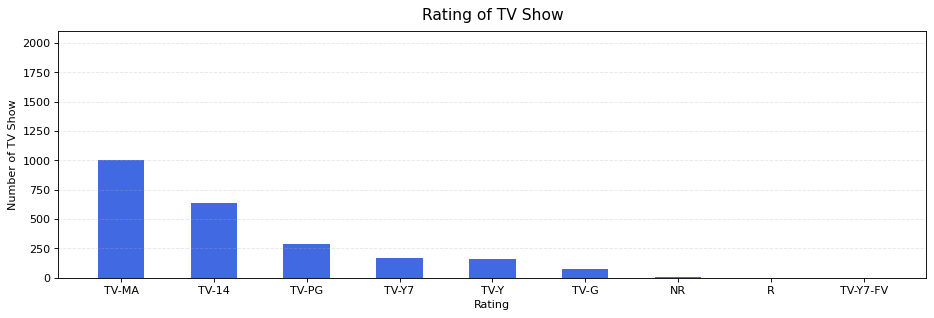

In [544]:
data = pd.DataFrame(table_tv['rating'].value_counts())
data=data.drop(index=['Unknown'])# drop unknown data
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.bar(data.index, data['count'], color='royalblue', width=0.5)
ax.yaxis.grid(alpha=0.3, ls='--')
ax.set_ylim(0,2100)
ax.set_title('Rating of TV Show', y=1.02, fontsize=14)
ax.set_xlabel('Rating')
ax.set_ylabel('Number of TV Show')
plt.show()

It can be seen from the graph that the number of TV-MA and TV-14 shows is relatively high (over 500)

**Group by TV show rating and release year, and count the number of releases**

In [546]:
pivot_tv = pd.DataFrame(table_tv.groupby(['rating', 'release_year']).size())

pivot_tv=pivot_tv.drop(index=['Unknown'])# drop unknown data
pivot_tv

0
rating   release_year    
NR       2004           1
         2013           3
         2015           1
R        2015           1
         2016           1
...                    ..
TV-Y7    2017          26
         2018          28
         2019          22
         2020          25
TV-Y7-FV 2014           1

[112 rows x 1 columns]

**Pivot the table above**

In [547]:
t_tv = pd.pivot_table(pivot_tv, index=['release_year'], columns=['rating']).fillna(0).astype('int32')[0]
t_tv

rating,NR,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV
release_year,,,,,,,,,
2000,0,0,0,0,0,2,0,2,0
2001,0,0,2,1,0,0,0,1,0
2002,0,0,3,0,1,1,0,1,0
2003,0,0,5,0,0,2,0,2,0
2004,1,0,3,0,2,1,1,1,0
2005,0,0,5,0,3,1,0,3,0
2006,0,0,6,0,4,2,0,1,0
2007,0,0,4,0,4,1,1,3,0
2008,0,0,10,2,5,3,1,2,0


**Observe the release trends of movies of each rating**

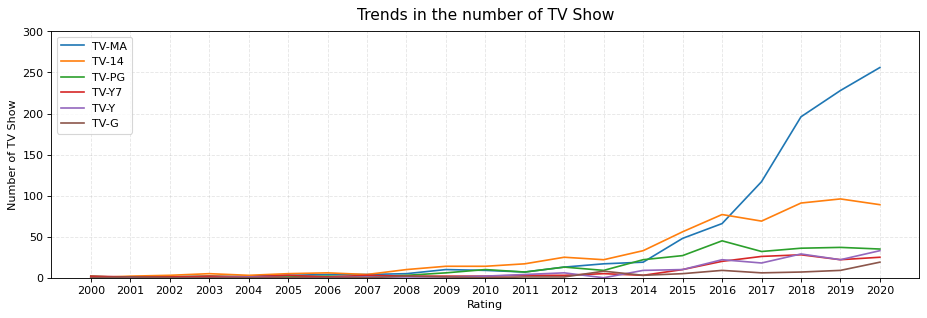

In [548]:
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.plot(t_tv.index, t_tv['TV-MA'], label='TV-MA')
ax.plot(t_tv.index, t_tv['TV-14'], label='TV-14')
ax.plot(t_tv.index, t_tv['TV-PG'], label='TV-PG')
ax.plot(t_tv.index, t_tv['TV-Y7'], label='TV-Y7')
ax.plot(t_tv.index, t_tv['TV-Y'], label='TV-Y')
ax.plot(t_tv.index, t_tv['TV-G'], label='TV-G')
ax.grid(alpha=0.3, ls='--')
ax.set_xticks(np.arange(2000,2021,1))
ax.legend(loc='upper left')
ax.set_ylim(0,300)
ax.set_title('Trends in the number of TV Show', y=1.02, fontsize=14)
ax.set_xlabel('Rating')
ax.set_ylabel('Number of TV Show')
plt.show()

Similar to movies, the production volume was relatively low before 2015. In 2015 and 2016, production increased significantly.  
Starting from 2017, the production of TV-MA rated movies continued to rise, while the production of TV-14 and TV-PG remained stable.  
TV-MA and TV-14 shows outnumber other ratings.

## Analyze the number of works by each director

**Review the dataset**

In [551]:
df.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,categories
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020-08-14,2020,TV-MA,4 Seasons,International
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016-12-23,2016,TV-MA,93 min,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2018-12-20,2011,R,78 min,Horror
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2017-11-16,2009,PG-13,80 min,Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2020-01-01,2008,PG-13,123 min,Dramas


**Check the number of rows with missing values in the director column**

In [563]:
print(len(df[df['director']=='Unknown']))


2318


**Check for missing data in the TV series director column**

In [561]:
print(len(table_tv[table_tv['director']=='Unknown']))

2164


**Check for missing data in the movie director column**

In [562]:

print(len(table_mv[table_mv['director']=='Unknown']))

154


As shown in the data above, most of the director information for TV series is missing, whereas only a small number of movie records lack director data. Therefore, the subsequent analysis will focus on the number of works by movie directors only

**Observe how many directors are recorded in the dataset**

In [569]:
table_mv['director'].nunique()
# Remove rows where 'director' is 'Unknown'
table_mv = table_mv[table_mv['director'] != 'Unknown']


In [570]:
director = table_mv['director'].value_counts().head(10)
director

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Kunle Afolayan             8
Robert Rodriguez           8
Lance Bangs                8
Hakan Algül                8
Shannon Hartman            8
Name: count, dtype: int64

In [571]:
pd.DataFrame({'directors':director.index, 'counts':director.values})

,directors,counts
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,15
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Kunle Afolayan,8
6,Robert Rodriguez,8
7,Lance Bangs,8
8,Hakan Algül,8
9,Shannon Hartman,8


## Analyze Movie Duration Distribution

Clean the movie dataset by removing entries without director information

In [572]:
data = table_mv.loc[table_mv['director'].notnull()].reset_index()
data.head()

,index,show_id,type,title,director,cast,date_added,release_year,rating,duration,categories
0,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016-12-23,2016,TV-MA,93 min,Dramas
1,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2018-12-20,2011,R,78 min,Horror
2,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2017-11-16,2009,PG-13,80 min,Action
3,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2020-01-01,2008,PG-13,123 min,Dramas
4,6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",2020-06-01,2019,TV-MA,95 min,Horror


In [573]:
data.shape

(4809, 11)

**Convert the duration column to the int32 data type**

In [574]:
data = data.convert_dtypes()

In [575]:
l = []
for x in (np.arange(0,4809)):
    l.append(data['duration'][x].replace(' min',''))

In [576]:
data['duration'] = l

In [577]:
data['duration'] = data['duration'].astype('int32')

**Observe the distribution of movie durations**

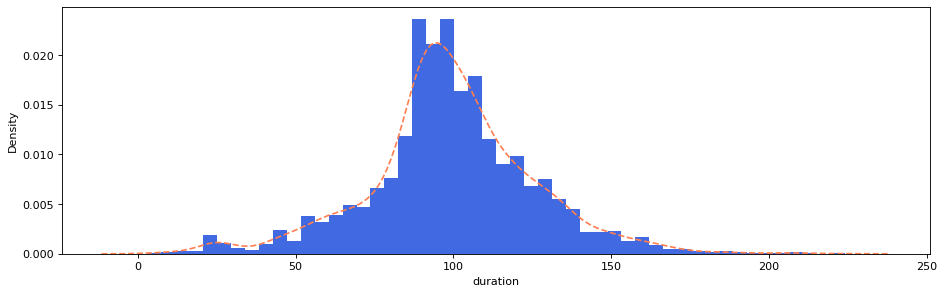

In [578]:
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.hist(data['duration'], bins=50, density=True, color='royalblue', label='hist')
sns.kdeplot(data['duration'], color='coral', ls='--', label='kde')
plt.show()

## Analyze the classification of movies and TV shows

**Analyze the Number of TV Shows by Category**

In [581]:
tv_count = table_tv['categories'].value_counts()
tv_count = pd.DataFrame({'Categories':tv_count.index, 'Counts':tv_count.values})
tv_count

,Categories,Counts
0,International,686
1,Crime,366
2,Kids,343
3,British,227
4,TV,219
5,Docuseries,187
6,Anime,141
7,Reality,99
8,Stand-Up,32
9,Romantic,28


**Pivot the TV drama data table**

In [580]:
m = table_tv.groupby(['categories', 'release_year']).size()
m

categories  release_year
Anime       2000             1
            2001             1
            2002             1
            2003             1
            2005             1
                            ..
TV          2016            10
            2017            28
            2018            27
            2019            62
            2020            54
Length: 164, dtype: int64

In [582]:
m = pd.DataFrame(m).rename(columns={0:'count'})
m

count
categories release_year       
Anime      2000              1
           2001              1
           2002              1
           2003              1
           2005              1
...                        ...
TV         2016             10
           2017             28
           2018             27
           2019             62
           2020             54

[164 rows x 1 columns]

In [583]:
m = pd.pivot_table(m, index=['release_year'], columns=['categories']).fillna(0)['count'].astype('int32')
m

categories,Anime,British,Classic,Crime,Docuseries,International,Kids,Reality,Romantic,Spanish-Language,Stand-Up,TV
release_year,,,,,,,,,,,,
2000,1,0,0,0,0,0,1,0,0,0,0,2
2001,1,2,0,0,0,0,1,0,0,0,0,0
2002,1,0,0,0,0,3,1,0,1,0,0,0
2003,1,0,2,0,0,4,1,0,0,0,0,1
2004,0,1,1,1,0,4,2,0,0,0,0,0
2005,1,2,0,0,0,3,3,0,0,0,0,3
2006,3,3,1,0,0,1,1,1,1,0,0,2
2007,1,0,1,1,2,1,3,0,0,0,1,3
2008,7,2,1,3,0,5,4,0,1,0,0,0


**Examine the release trend of TV shows over time**

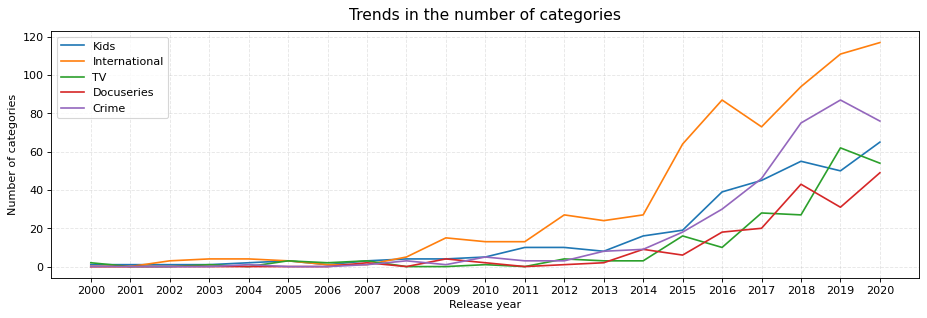

In [584]:
fig,ax=plt.subplots(figsize=(14,4),dpi=80)
ax.plot(m.index, m['Kids'], label='Kids')
ax.plot(m.index, m['International'], label='International')
ax.plot(m.index, m['TV'], label='TV')
ax.plot(m.index, m['Docuseries'], label='Docuseries')
ax.plot(m.index, m['Crime'], label='Crime')
ax.set_xticks(np.arange(2000,2021,1))
ax.legend()
ax.set_title('Trends in the number of categories', y=1.02, fontsize=14)
ax.set_xlabel('Release year')
ax.set_ylabel('Number of categories')
ax.grid(alpha=0.3, ls='--')
plt.show()

From the chart, it can be seen that TV shows in the International, Kids, and Crime categories have shown faster growth compared to other categories.

**Observe the data of each category of movies**

In [585]:
mv_count = table_mv['categories'].value_counts()
mv_count = pd.DataFrame({'Categories':mv_count.index, 'Counts':mv_count.values})
mv_count

,Categories,Counts
0,Dramas,1292
1,Comedies,985
2,Documentaries,694
3,Action,609
4,Children,445
5,Stand-Up,282
6,Horror,238
7,International,109
8,Thrillers,44
9,Movies,35


**Conduct a data pivot on the movie dataset to observe the trend in the number of movies in each genre**

In [586]:
v = pd.DataFrame(table_mv.groupby(['categories', 'release_year']).size()).rename(columns={0:'count'})
v

count
categories release_year       
Action     2000              7
           2001              8
           2002             12
           2003             12
           2004             15
...                        ...
Thrillers  2016              6
           2017              8
           2018              7
           2019             10
           2020              3

[221 rows x 1 columns]

In [587]:
v = pd.pivot_table(v, index=['release_year'], columns=['categories']).fillna(0).astype('int32')['count']
v

categories,Action,Anime,Children,Classic,Comedies,Cult,Documentaries,Dramas,Horror,Independent,International,LGBTQ,Movies,Music,Romantic,Sci-Fi,Stand-Up,Thrillers
release_year,,,,,,,,,,,,,,,,,,
2000,7,0,6,0,8,1,0,5,2,0,0,0,0,0,0,0,1,0
2001,8,0,4,0,11,0,0,7,0,0,0,0,0,0,0,0,1,1
2002,12,0,3,0,3,0,3,14,1,0,1,0,0,0,0,0,1,1
2003,12,0,6,0,10,0,0,8,4,0,0,0,0,0,0,0,0,0
2004,15,0,8,0,10,0,1,10,1,1,3,0,1,0,0,0,0,0
2005,12,0,6,0,18,0,3,15,2,1,1,0,1,0,0,0,1,0
2006,9,0,7,0,24,0,2,17,4,1,2,0,0,0,0,1,4,1
2007,14,0,9,0,18,1,4,22,2,0,0,0,0,0,0,0,1,1
2008,21,0,9,0,30,0,4,27,3,0,3,0,1,1,0,0,1,0


**Analyze the release trends of different movie genres over time**

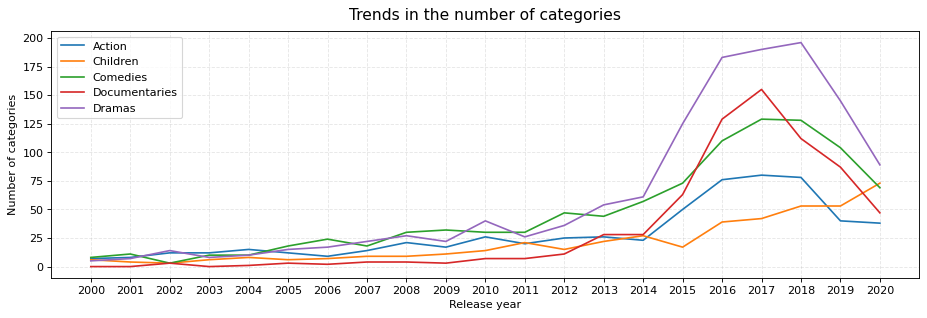

In [588]:
fig,ax=plt.subplots(figsize=(14,4),dpi=80)
ax.plot(v.index, v['Action'], label='Action')
ax.plot(v.index, v['Children'], label='Children')
ax.plot(v.index, v['Comedies'], label='Comedies')
ax.plot(v.index, v['Documentaries'], label='Documentaries')
ax.plot(v.index, v['Dramas'], label='Dramas')
ax.set_xticks(np.arange(2000,2021,1))
ax.legend()
ax.set_title('Trends in the number of categories', y=1.02, fontsize=14)
ax.set_xlabel('Release year')
ax.set_ylabel('Number of categories')
ax.grid(alpha=0.3, ls='--')
plt.show()

## Observe the number of productions released by different countries

**Show the changes in the number of movies and TV shows from different countries over the years**

In [619]:

import plotly.express as px

# Fill missing values
df.fillna('', inplace=True)

# Extract only the year from 'date_added' (handles cases like '2021-09-25')
df['year_added'] = df['date_added'].astype(str).str.extract(r'(\d{4})')

# Replace 'NULL' values with '2020'
df['year_added'].fillna('2020', inplace=True)

# Convert 'year_added' to integer type
df['year_added'] = df['year_added'].astype(int)

# df[df['year_added']==2002]

C:\Users\zixin kuai\AppData\Local\Temp\ipykernel_38592\1385382366.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [617]:

# Process 'country' column (split multiple countries)
df['country'] = df['country'].dropna().apply(lambda x: x.replace(',', '').split(','))

# Expand 'country' data so that each country has its own row
lst_col = 'country'
data2 = pd.DataFrame({
    col: np.repeat(df[col].values, df[lst_col].str.len())  # Duplicate other column data
    for col in df.columns.drop(lst_col)
}).assign(**{lst_col: np.concatenate(df[lst_col].values)})  # Expand 'country' column

# Count the number of movies/TV shows per country per year
year_country2 = data2.groupby(['year_added'])['country'].value_counts().reset_index(name='counts')

AttributeError: 'list' object has no attribute 'replace'

In [620]:
# Create a dynamic choropleth map
fig = px.choropleth(
    year_country2,
    locations="country",
    color="counts",
    locationmode="country names",
    animation_frame="year_added",  # Animate by year
    range_color=[0, 200],  # Set color range
    color_continuous_scale=px.colors.sequential.OrRd  # Gradient color scale
)


fig.update_layout(
    title="Comparison by country",
    updatemenus=[{
        
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

# Set chart title
# fig.update_layout(title="Comparison by country")

# Display the map
fig.show()